## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요?
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여, 미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여 미세먼지 농도를 예측하는 머신러닝 모델 구현

### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2024.csv : 2024년 미세먼지 데이터
    * weather_2024.csv : 2024년 날씨 데이터
* 테스트 데이터
    * air_2025.csv : 2025년 미세먼지 데이터
    * weather_2025.csv : 2025년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_202x)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

### (1) 경로 설정
* 구글 코랩 (또는 필요시 로컬)를 사용하시면 됩니다.

#### 1) 구글 코랩 수행

* 구글 드라이브 연결

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

In [8]:
# path = '/content/drive/MyDrive/project1/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [ ]:
# 필요한 라이브러리 설치 및 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.
import os


> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
<small>(해결되지 않는다면 아래 Colab 한글 깨짐 현상 해결법 참고)<br>https://developnote.tistory.com/165#google_vignette </small>

In [11]:
# (Jupyter) 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [ ]:
# (Colab) 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
!apt -qq -y install fonts-nanum > /dev/null
!rm -rf ~/.cache/matplotlib

import matplotlib as mpl
import matplotlib.font_manager as fm
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fm.fontManager.addfont(font_path)
# mpl.rcParams['font.family'] = 'NanumGothic'
# mpl.rcParams['axes.unicode_minus'] = False

### (3) 데이터 불러오기
* Pandas 라이브러리를 활용해서 'air_2024.csv'파일을 'air_24' 변수에,'air_2025.csv'파일을 'air_25' 변수에 저장하고 그 데이터를 확인하세요.
 ( 구분자/인코딩 sep = ',',encoder = 'cp949')

* Pandas 라이브러리를 활용해서 'weather_2024.csv'파일을 'weather_24' 변수에,'weather_2025.csv'파일을 'weather_25' 변수에 저장하고 그 데이터를 확인하세요.
 ( 구분자/인코딩 sep = ',',encoder = 'cp949')

#### 1) 데이터로딩

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 데이터 로딩
file_list = []
print(os.listdir('./')[-4:])
for fn in os.listdir('./')[-4:]:
    file_list.append(pd.read_csv('./'+fn,encoding='cp949', sep=','))

air_24 = file_list[0]
air_25 = file_list[1]
weather_24 = file_list[2]
weather_25 = file_list[3]

['air_2024.csv', 'air_2025.csv', 'weather_2024.csv', 'weather_2025.csv']


#### 2) 기본 정보 조회
- 데이터를 head, tail. describe, info 등을 활용하여 확인하세요.

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_24.info()
weather_25.info()
366*24

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8784 non-null   int64  
 1   지점명            8784 non-null   object 
 2   일시             8784 non-null   object 
 3   기온(°C)         8784 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        956 non-null    float64
 6   강수량 QC플래그      1732 non-null   float64
 7   풍속(m/s)        8753 non-null   float64
 8   풍속 QC플래그       13 non-null     float64
 9   풍향(16방위)       8753 non-null   float64
 10  풍향 QC플래그       13 non-null     float64
 11  습도(%)          8784 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8784 non-null   float64
 14  이슬점온도(°C)      8784 non-null   float64
 15  현지기압(hPa)      8784 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8784 non-null   float64
 18  해면기압 QC플

8784

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_24.head(10)

,지역,망,측정소코드,측정소명,측정일시,SO2,CO,O3,NO2,PM10,PM25,주소
0,서울 종로구,도시대기,111123,종로구,2024010101,0.0031,1.21,0.0022,0.0425,29.0,23.0,서울 종로구 종로35가길 19
1,서울 종로구,도시대기,111123,종로구,2024010102,0.0032,1.16,0.0020,0.0393,24.0,21.0,서울 종로구 종로35가길 19
2,서울 종로구,도시대기,111123,종로구,2024010103,0.0030,1.00,0.0022,0.0359,23.0,19.0,서울 종로구 종로35가길 19
3,서울 종로구,도시대기,111123,종로구,2024010104,0.0029,0.98,0.0021,0.0355,23.0,18.0,서울 종로구 종로35가길 19
4,서울 종로구,도시대기,111123,종로구,2024010105,0.0031,1.02,0.0020,0.0371,25.0,21.0,서울 종로구 종로35가길 19
5,서울 종로구,도시대기,111123,종로구,2024010106,0.0031,1.02,0.0022,0.0372,26.0,21.0,서울 종로구 종로35가길 19
6,서울 종로구,도시대기,111123,종로구,2024010107,0.0031,0.88,0.0020,0.0334,21.0,20.0,서울 종로구 종로35가길 19
7,서울 종로구,도시대기,111123,종로구,2024010108,0.0031,0.97,0.0021,0.0341,19.0,16.0,서울 종로구 종로35가길 19
8,서울 종로구,도시대기,111123,종로구,2024010109,0.0027,0.79,0.0037,0.0316,16.0,16.0,서울 종로구 종로35가길 19
9,서울 종로구,도시대기,111123,종로구,2024010110,0.0031,0.73,0.0088,0.0263,18.0,15.0,서울 종로구 종로35가길 19


In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
weather_24.tail(10)

,지점,지점명,일시,기온(°C),기온 QC플래그,강수량(mm),강수량 QC플래그,풍속(m/s),풍속 QC플래그,풍향(16방위),...,최저운고(100m ),시정(10m),지면상태(지면상태코드),현상번호(국내식),지면온도(°C),지면온도 QC플래그,5cm 지중온도(°C),10cm 지중온도(°C),20cm 지중온도(°C),30cm 지중온도(°C)
8774,108,서울,2024-12-31 14:00,3.5,NaN,NaN,9.0,2.7,NaN,270.0,...,NaN,3926,NaN,NaN,4.6,NaN,-0.2,-0.3,0.7,1.6
8775,108,서울,2024-12-31 15:00,3.9,NaN,NaN,9.0,2.4,NaN,270.0,...,NaN,4227,NaN,NaN,3.0,NaN,-0.2,-0.3,0.8,1.7
8776,108,서울,2024-12-31 16:00,3.9,NaN,NaN,9.0,2.9,NaN,250.0,...,NaN,3396,NaN,NaN,0.5,NaN,-0.1,-0.3,0.8,1.7
8777,108,서울,2024-12-31 17:00,2.5,NaN,NaN,9.0,3.4,NaN,270.0,...,NaN,3570,NaN,NaN,-0.2,NaN,-0.1,-0.3,0.8,1.7
8778,108,서울,2024-12-31 18:00,1.2,NaN,NaN,9.0,3.1,NaN,250.0,...,NaN,3672,NaN,NaN,-0.4,NaN,-0.2,-0.2,0.9,1.7
8779,108,서울,2024-12-31 19:00,0.5,NaN,NaN,9.0,1.9,NaN,270.0,...,NaN,3760,NaN,NaN,-0.6,NaN,-0.2,-0.3,0.9,1.7
8780,108,서울,2024-12-31 20:00,0.0,NaN,NaN,9.0,2.4,NaN,250.0,...,NaN,3645,NaN,NaN,-0.9,NaN,-0.4,-0.3,0.9,1.7
8781,108,서울,2024-12-31 21:00,-0.7,NaN,NaN,9.0,1.0,NaN,270.0,...,NaN,3794,NaN,NaN,-1.3,NaN,-0.3,-0.3,0.9,1.7
8782,108,서울,2024-12-31 22:00,-1.0,NaN,NaN,9.0,0.7,NaN,320.0,...,NaN,3779,NaN,NaN,-1.9,NaN,-0.3,-0.3,0.9,1.7
8783,108,서울,2024-12-31 23:00,-1.4,NaN,NaN,9.0,1.3,NaN,250.0,...,NaN,3412,NaN,NaN,-2.6,NaN,-0.3,-0.3,0.9,1.7


In [17]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
air_24._get_numeric_data()

,측정소코드,측정일시,SO2,CO,O3,NO2,PM10,PM25
0,111123,2024010101,0.0031,1.21,0.0022,0.0425,29.0,23.0
1,111123,2024010102,0.0032,1.16,0.0020,0.0393,24.0,21.0
2,111123,2024010103,0.0030,1.00,0.0022,0.0359,23.0,19.0
3,111123,2024010104,0.0029,0.98,0.0021,0.0355,23.0,18.0
4,111123,2024010105,0.0031,1.02,0.0020,0.0371,25.0,21.0
...,...,...,...,...,...,...,...,...
8779,111123,2024123120,0.0027,0.36,0.0284,0.0166,25.0,14.0
8780,111123,2024123121,0.0026,0.36,0.0257,0.0187,23.0,12.0
8781,111123,2024123122,0.0026,0.40,0.0204,0.0238,19.0,12.0
8782,111123,2024123123,0.0023,0.48,0.0135,0.0314,21.0,13.0


In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
for f in file_list:
    print(f.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      8784 non-null   object 
 1   망       8784 non-null   object 
 2   측정소코드   8784 non-null   int64  
 3   측정소명    8784 non-null   object 
 4   측정일시    8784 non-null   int64  
 5   SO2     8591 non-null   float64
 6   CO      8684 non-null   float64
 7   O3      8661 non-null   float64
 8   NO2     8665 non-null   float64
 9   PM10    8649 non-null   float64
 10  PM25    8658 non-null   float64
 11  주소      8784 non-null   object 
dtypes: float64(6), int64(2), object(4)
memory usage: 823.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      2880 non-null   object 
 1   망       2880 non-null   object 
 2   측정소코드   2880 non-null   int64  
 3   측정소명    2

## **2.EDA 1단계 - 데이터 기본 탐색 및 분석**

* 단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

    * <span style="color: green"> 4 ~ 5개 변수를 뽑아 확인해보세요 </span>
    * <span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

        - 변수가 수치형인지, 범주형인지
        - 결측치 존재 여부 및 조치 방안
        - 기초 통계량 확인
        - 데이터 분포 확인
        - 변수가 내포하고 있는 의미 파악을 위한 추가 분석
        - 위 정보로부터 파악한 내용 정리


### (1) 변수1 : 측정일시

In [19]:
# 변수가 수치형인지, 범주형인지 확인해 보세요
for data,name in zip(file_list,['air_24','air_25','weather_24','weather_25']):
    all_columns = data.columns.tolist()
    num_columns = data._get_numeric_data().columns.tolist()

    cat_columns = list(set(all_columns) - set(num_columns))
    print(f'{name} 모든 컬럼 \n{all_columns}\n')
    print(f'{name} 수치형 컬럼 \n{num_columns}\n')
    print(f'{name} 범주형 컬럼 \n{cat_columns}\n\n')

air_24 모든 컬럼 
['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소']

air_24 수치형 컬럼 
['측정소코드', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

air_24 범주형 컬럼 
['측정소명', '망', '주소', '지역']


air_25 모든 컬럼 
['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소']

air_25 수치형 컬럼 
['측정소코드', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

air_25 범주형 컬럼 
['측정소명', '망', '주소', '지역']


weather_24 모든 컬럼 
['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

weather_24 수치형 컬럼 
['지점', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그',

In [ ]:
# 기초 통계량을 확인해 보세요
a24_tmp.describe()

,CO,O3,NO2,PM10,PM25
count,8684.000000,8661.000000,8665.000000,8649.000000,8658.000000
mean,0.412198,0.034355,0.019635,30.660308,18.975629
std,0.169987,0.021484,0.013290,24.811649,13.612901
min,0.100000,0.001300,0.002800,3.000000,1.000000
25%,0.300000,0.020400,0.010500,17.000000,10.000000
50%,0.370000,0.031500,0.015800,26.000000,16.000000
75%,0.480000,0.044600,0.024300,38.000000,25.000000
max,1.560000,0.177300,0.106400,442.000000,96.000000


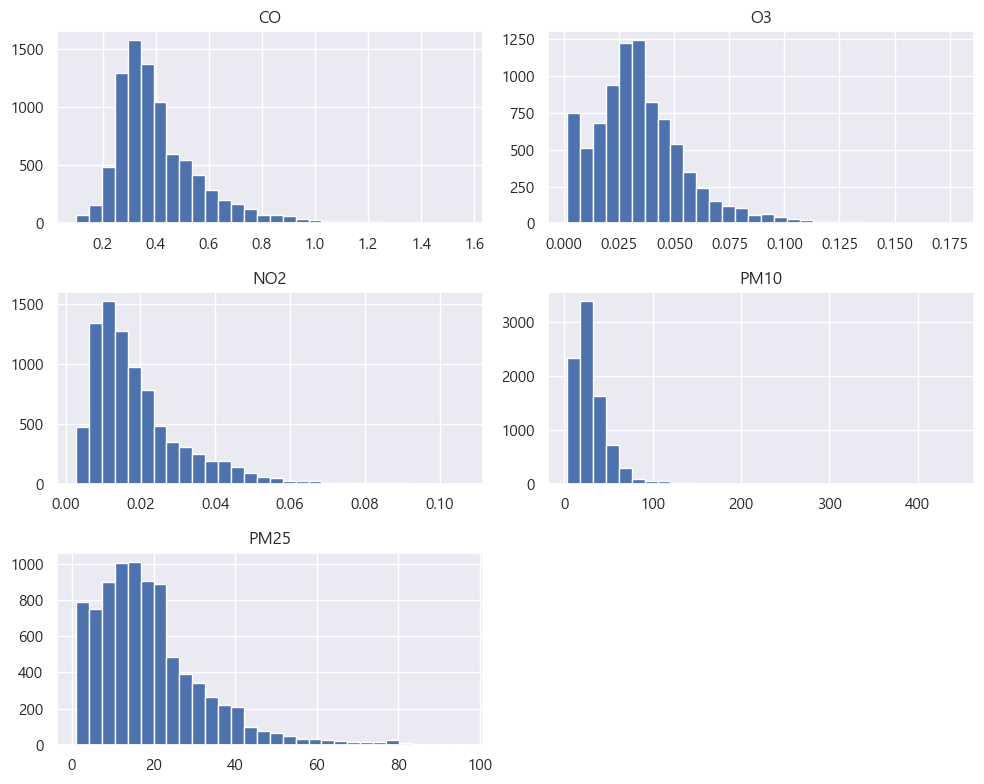

In [ ]:
# 데이터 분포를 시각해 보세요
a24_tmp.hist(bins=30, figsize=(10,8))
plt.tight_layout()
plt.show()

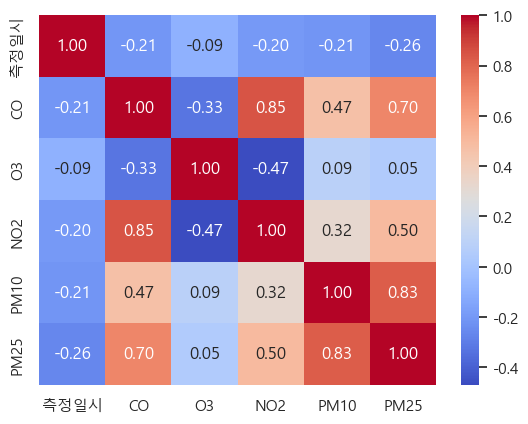

In [ ]:
# 변수가 내포하고 있는 의미 파악을 위한 추가 분석
# (예: 상관분석, 시계열 분석, 그룹별 통계량 비교 등)
a24_tmp.corr()
sns.heatmap(a24_tmp.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [ ]:
# 위 정보로부터 파악한 내용을 서술해 보세요
# CO, O3, NO2, PM10, PM25 변수 간에 유의미한 상관관계가 존재함을 확인할 수 있다.
# 결측치 존재 여부를 확인하고 조치 방안을 검토해 보세요
a24_tmp = air_24.loc[:,['측정일시', 'CO', 'O3', 'NO2', 'PM10', 'PM25']] 
a24_tmp['측정일시'] = a24_tmp['측정일시'].astype(str)
a24_tmp['time'] = a24_tmp['측정일시'].str.slice(0, 10)
a24_tmp['time'] = pd.to_datetime(a24_tmp['time'],format='%Y%m%d%H', errors='coerce')
a24_tmp.set_index('time', inplace=True) 
a24_tmp = a24_tmp.interpolate(method='linear')
a24_tmp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2024-01-01 01:00:00 to NaT
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   측정일시    8784 non-null   object 
 1   CO      8784 non-null   float64
 2   O3      8784 non-null   float64
 3   NO2     8784 non-null   float64
 4   PM10    8784 non-null   float64
 5   PM25    8784 non-null   float64
dtypes: float64(5), object(1)
memory usage: 480.4+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_8484\3419019841.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  a24_tmp = a24_tmp.interpolate(method='linear')


### (2) 변수2

In [ ]:
# 변수가 수치형인지, 범주형인지 확인해 보세요
for data,name in zip(file_list,['air_24','air_25','weather_24','weather_25']):
    all_columns = data.columns.tolist()
    num_columns = data._get_numeric_data().columns.tolist()

    cat_columns = list(set(all_columns) - set(num_columns))
    print(f'{name} 모든 컬럼 \n{all_columns}\n')
    print(f'{name} 수치형 컬럼 \n{num_columns}\n')
    print(f'{name} 범주형 컬럼 \n{cat_columns}\n\n')

air_24 모든 컬럼 
['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소']

air_24 수치형 컬럼 
['측정소코드', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

air_24 범주형 컬럼 
['측정소명', '지역', '주소', '망']


air_25 모든 컬럼 
['지역', '망', '측정소코드', '측정소명', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '주소']

air_25 수치형 컬럼 
['측정소코드', '측정일시', 'SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']

air_25 범주형 컬럼 
['측정소명', '지역', '주소', '망']


weather_24 모든 컬럼 
['지점', '지점명', '일시', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그', '풍속(m/s)', '풍속 QC플래그', '풍향(16방위)', '풍향 QC플래그', '습도(%)', '습도 QC플래그', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '현지기압 QC플래그', '해면기압(hPa)', '해면기압 QC플래그', '일조(hr)', '일조 QC플래그', '일사(MJ/m2)', '일사 QC플래그', '적설(cm)', '3시간신적설(cm)', '전운량(10분위)', '중하층운량(10분위)', '운형(운형약어)', '최저운고(100m )', '시정(10m)', '지면상태(지면상태코드)', '현상번호(국내식)', '지면온도(°C)', '지면온도 QC플래그', '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)']

weather_24 수치형 컬럼 
['지점', '기온(°C)', '기온 QC플래그', '강수량(mm)', '강수량 QC플래그',

In [ ]:
# 결측치 존재 여부를 확인하고 조치 방안을 검토해 보세요
a25_tmp = air_25.loc[:,['측정일시', 'CO', 'O3', 'NO2', 'PM10', 'PM25']]
a25_tmp['측정일시'] = a25_tmp['측정일시'].astype(str)
a25_tmp['time'] = a25_tmp['측정일시'].str.slice(0, 10)
a25_tmp['time'] = pd.to_datetime(a25_tmp['time'],format='%Y%m%d%H', errors='coerce')
a25_tmp.set_index('time', inplace=True) 
a25_tmp

,측정일시,CO,O3,NO2,PM10,PM25
time,,,,,,
2025-01-01 01:00:00,2025010101,0.68,0.0045,0.0425,23.0,12.0
2025-01-01 02:00:00,2025010102,0.73,0.0034,0.0457,24.0,11.0
2025-01-01 03:00:00,2025010103,0.77,0.0032,0.0478,23.0,13.0
2025-01-01 04:00:00,2025010104,0.76,0.0036,0.0458,31.0,17.0
2025-01-01 05:00:00,2025010105,0.72,0.0035,0.0460,31.0,16.0
...,...,...,...,...,...,...
2025-04-30 20:00:00,2025043020,0.39,0.0591,0.0225,45.0,20.0
2025-04-30 21:00:00,2025043021,0.50,0.0553,0.0273,45.0,23.0
2025-04-30 22:00:00,2025043022,0.36,0.0701,0.0164,45.0,23.0


In [ ]:
# 기초 통계량을 확인해 보세요
a25_tmp.describe()

,CO,O3,NO2,PM10,PM25
count,2855.000000,2855.000000,2855.000000,2853.000000,2848.000000
mean,0.468186,0.033284,0.023588,45.134946,27.939256
std,0.187644,0.018110,0.014659,27.478036,18.991989
min,0.210000,0.001500,0.004800,3.000000,1.000000
25%,0.340000,0.020850,0.012100,26.000000,14.000000
50%,0.410000,0.034000,0.018800,40.000000,23.000000
75%,0.560000,0.044350,0.031700,57.000000,36.000000
max,1.750000,0.090200,0.082700,271.000000,129.000000


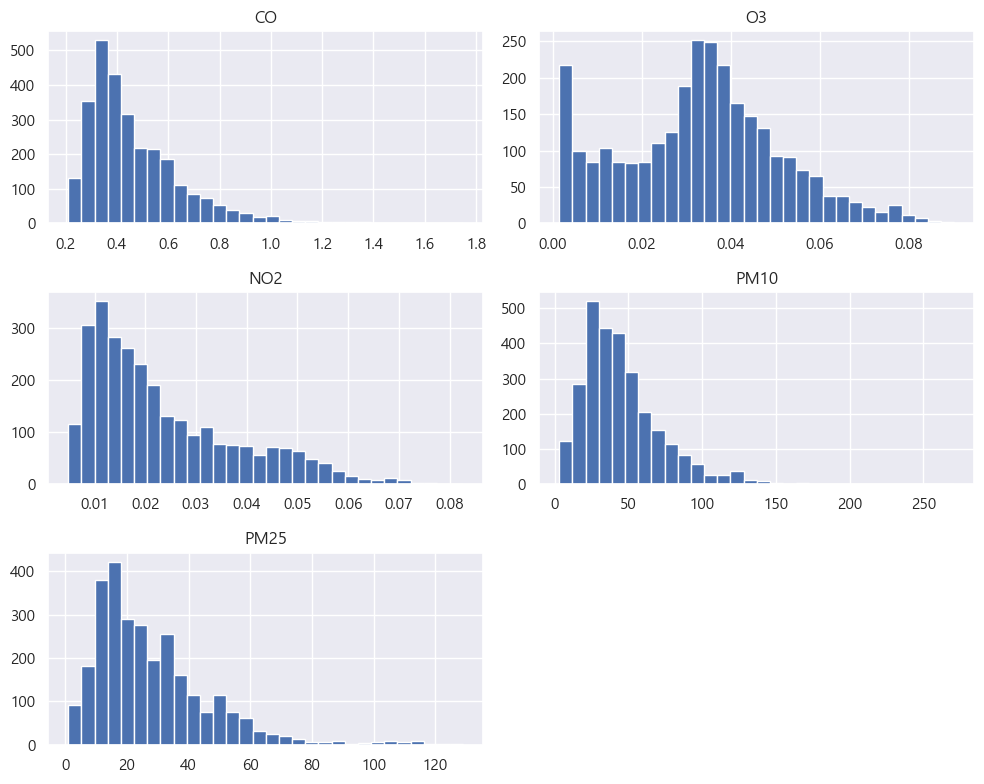

In [ ]:
# 데이터 분포를 시각해 보세요
a25_tmp.hist(bins=30, figsize=(10,8))
plt.tight_layout()
plt.show()

In [ ]:
# 변수가 내포하고 있는 의미 파악을 위한 추가 분석
# (예: 상관분석, 시계열 분석, 그룹별 통계량 비교 등)
a25_tmp.corr()

,측정일시,CO,O3,NO2,PM10,PM25
측정일시,1.000000,-0.293302,0.548635,-0.202502,0.070988,-0.092685
CO,-0.293302,1.000000,-0.612013,0.885123,0.497440,0.683095
O3,0.548635,-0.612013,1.000000,-0.697880,0.063036,-0.132779
NO2,-0.202502,0.885123,-0.697880,1.000000,0.349102,0.494477
PM10,0.070988,0.497440,0.063036,0.349102,1.000000,0.832289
PM25,-0.092685,0.683095,-0.132779,0.494477,0.832289,1.000000


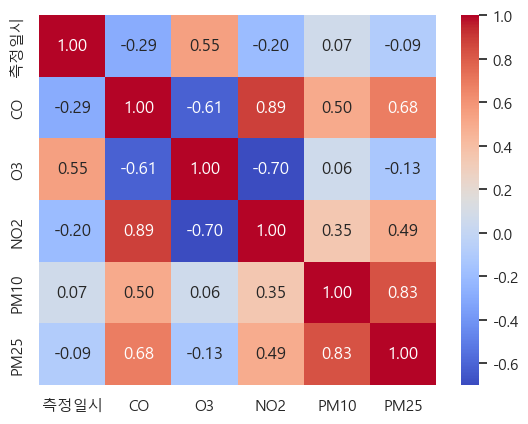

In [ ]:
# 위 정보로부터 파악한 내용을 서술해 보세요
# CO, O3, NO2, PM10, PM25 변수 간에 유의미한 상관관계가 존재함을 확인할 수 있다.    
sns.heatmap(a25_tmp.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### (3) 변수3

In [ ]:
# 변수가 수치형인지, 범주형인지 확인해 보세요
weather_24._get_numeric_data().columns.tolist()
weather_24.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             8784 non-null   int64  
 1   지점명            8784 non-null   object 
 2   일시             8784 non-null   object 
 3   기온(°C)         8784 non-null   float64
 4   기온 QC플래그       0 non-null      float64
 5   강수량(mm)        956 non-null    float64
 6   강수량 QC플래그      1732 non-null   float64
 7   풍속(m/s)        8753 non-null   float64
 8   풍속 QC플래그       13 non-null     float64
 9   풍향(16방위)       8753 non-null   float64
 10  풍향 QC플래그       13 non-null     float64
 11  습도(%)          8784 non-null   int64  
 12  습도 QC플래그       0 non-null      float64
 13  증기압(hPa)       8784 non-null   float64
 14  이슬점온도(°C)      8784 non-null   float64
 15  현지기압(hPa)      8784 non-null   float64
 16  현지기압 QC플래그     0 non-null      float64
 17  해면기압(hPa)      8784 non-null   float64
 18  해면기압 QC플

In [ ]:
# 결측치 존재 여부를 확인하고 조치 방안을 검토해 보세요
w24_tmp = weather_24.loc[:,['일시','기온(°C)', '풍속(m/s)', '풍향(16방위)', '증기압(hPa)', '시정(10m)']]
w24_tmp['time'] = w24_tmp['일시'].astype(str)
w24_tmp['time'] = pd.to_datetime(w24_tmp['time'],format='%Y-%m-%d %H:%M', infer_datetime_format=True)
w24_tmp.set_index('time', inplace=True) 
w24_tmp = w24_tmp.interpolate(method='linear')
w24_tmp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8784 entries, 2024-01-01 00:00:00 to 2024-12-31 23:00:00
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   일시        8784 non-null   object 
 1   기온(°C)    8784 non-null   float64
 2   풍속(m/s)   8784 non-null   float64
 3   풍향(16방위)  8784 non-null   float64
 4   증기압(hPa)  8784 non-null   float64
 5   시정(10m)   8784 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 480.4+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_8484\2721841410.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  w24_tmp['time'] = pd.to_datetime(w24_tmp['time'],format='%Y-%m-%d %H:%M', infer_datetime_format=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8484\2721841410.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  w24_tmp = w24_tmp.interpolate(method='linear')


In [ ]:
# 기초 통계량을 확인해 보세요
w24_tmp.describe()
w24_tmp

,일시,기온(°C),풍속(m/s),풍향(16방위),증기압(hPa),시정(10m)
time,,,,,,
2024-01-01 00:00:00,2024-01-01 0:00,0.6,1.9,20.0,6.2,394
2024-01-01 01:00:00,2024-01-01 1:00,0.5,2.2,50.0,6.1,402
2024-01-01 02:00:00,2024-01-01 2:00,0.4,0.4,0.0,6.2,616
2024-01-01 03:00:00,2024-01-01 3:00,-0.1,1.7,20.0,6.0,265
2024-01-01 04:00:00,2024-01-01 4:00,-0.2,2.2,20.0,5.9,203
...,...,...,...,...,...,...
2024-12-31 19:00:00,2024-12-31 19:00,0.5,1.9,270.0,2.9,3760
2024-12-31 20:00:00,2024-12-31 20:00,0.0,2.4,250.0,2.9,3645
2024-12-31 21:00:00,2024-12-31 21:00,-0.7,1.0,270.0,3.0,3794


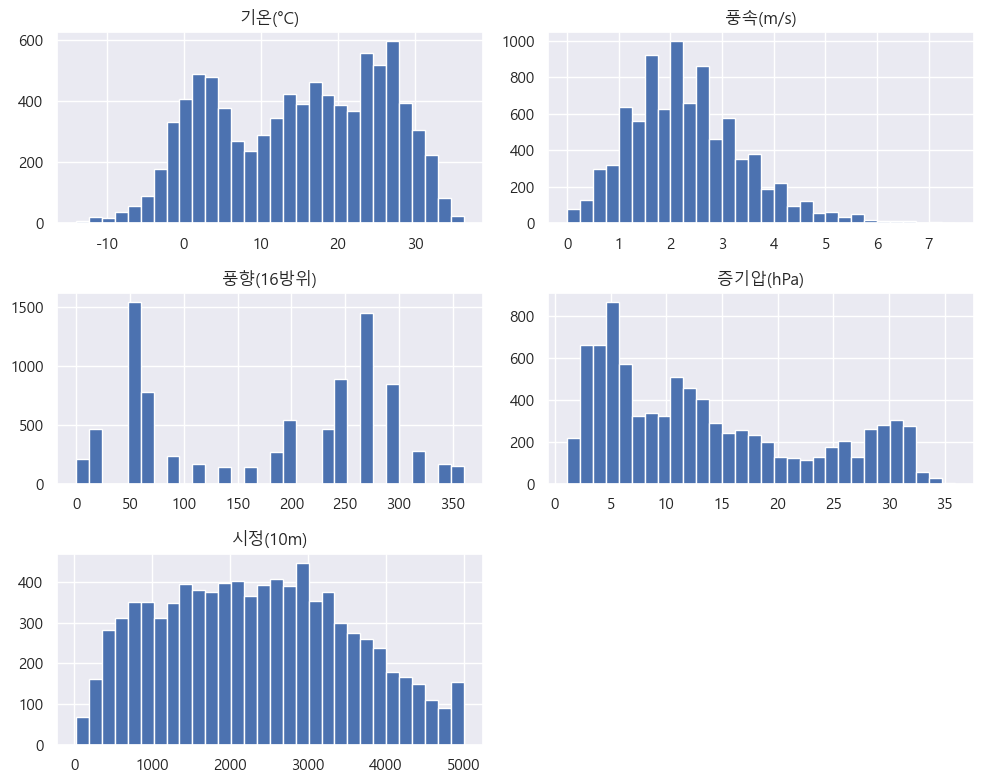

In [ ]:
# 데이터 분포를 시각해 보세요
w24_tmp.hist(bins=30, figsize=(10,8))
plt.tight_layout()
plt.show()  

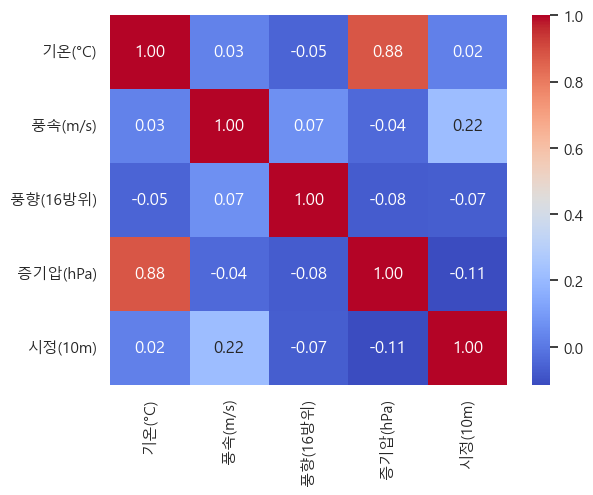

In [ ]:
# 변수가 내포하고 있는 의미 파악을 위한 추가 분석
# (예: 상관분석, 시계열 분석, 그룹별 통계량 비교 등)
numeric_df = w24_tmp.select_dtypes(include=['number'])
numeric_df.corr()
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()
# 위 정보로부터 파악한 내용을 서술해 보세요
# 풍속, 풍향, 증기압, 시정 변수 간에 유의미한 상관관계가 존재함을 확인할 수 있다.   

## **3.EDA 2단계 - 데이터 전처리**
- 진행한 개별 변수 분석에 맞추어 데이터를 전처리 하겠습니다.

### (1) air_24, air_25, weather_24, weather_25 데이터 전처리
* air_24, air_25 각각 '측정일시'를 활용하여 'time'변수 생성
    * 참고: 미세먼지 데이터는 1시-24시, 날씨 데이터는 0시-23시로 구성되어 있습니다. [2-3]에서 미세먼지와 날씨 데이터를 time 기준으로 합치려면 기준이 동일해야 합니다. 미세먼지 데이터에서 time 변수 생성 시 이를 미리 고려(예: air_24['측정일시'] -1)하세요.
* time 변수를 pd.to_datetime으로 데이터 타입 변경
    * 참고: format = '%Y%m%d%H'

#### **1) air_24, air_25 의 '측정일시'를 활용하여 'time' 변수 생성**

In [21]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
air_24['time'] = air_24['측정일시'] -1
air_24['time'] = air_24['time'].astype(str)
air_24['time'] = pd.to_datetime(air_24['time'], format='%Y%m%d%H', errors='coerce')
air_24.set_index('time', inplace=True)

air_25['time'] = air_25['측정일시'] -1
air_25['time'] = air_25['time'].astype(str)
air_25['time'] = pd.to_datetime(air_25['time'], format='%Y%m%d%H')
air_25.set_index('time', inplace=True)

#### **2) weather_24, weather_25 의 '일시'를 활용하여 'time' 변수 생성**
* weather_24, weather_25 의 '일시'를 활용하여 'time'변수 생성
* time 변수를 pd.to_datetime으로 데이터 타입 변경

In [22]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
weather_24['time'] = weather_24['일시'].astype(str)
weather_24['time'] = pd.to_datetime(weather_24['time'],format='%Y-%m-%d %H:%M', infer_datetime_format=True)
weather_24.set_index('time', inplace=True)

weather_25['time'] = weather_25['일시'].astype(str)
weather_25['time'] = pd.to_datetime(weather_25['time'],format='%Y-%m-%d %H:%M', infer_datetime_format=True)
weather_25.set_index('time', inplace=True)
# 결과확인

C:\Users\User\AppData\Local\Temp\ipykernel_22952\683212669.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_24['time'] = pd.to_datetime(weather_24['time'],format='%Y-%m-%d %H:%M', infer_datetime_format=True)
C:\Users\User\AppData\Local\Temp\ipykernel_22952\683212669.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_25['time'] = pd.to_datetime(weather_25['time'],format='%Y-%m-%d %H:%M', infer_datetime_format=True)


In [ ]:
weather_25.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점             3600 non-null   int64         
 1   지점명            3600 non-null   object        
 2   일시             3600 non-null   object        
 3   기온(°C)         3600 non-null   float64       
 4   기온 QC플래그       0 non-null      float64       
 5   강수량(mm)        340 non-null    float64       
 6   강수량 QC플래그      649 non-null    float64       
 7   풍속(m/s)        3600 non-null   float64       
 8   풍속 QC플래그       0 non-null      float64       
 9   풍향(16방위)       3600 non-null   int64         
 10  풍향 QC플래그       0 non-null      float64       
 11  습도(%)          3600 non-null   int64         
 12  습도 QC플래그       0 non-null      float64       
 13  증기압(hPa)       3600 non-null   float64       
 14  이슬점온도(°C)      3600 non-null   float64       
 15  현지기압(hPa)      3600 n

#### **3) 'time' 기준으로 데이터 합치기**
* 미세먼지 데이터와 날씨 데이터를 'time' 기준으로 합쳐보세요.
    * df_24에는 'time' 기준으로 24년도 미세먼지, 날씨 데이터를 합쳐보세요.
    * df_25에는 'time' 기준으로 25년도 미세먼지, 날씨 데이터를 합쳐보세요.

In [53]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
df_24 = pd.merge(air_24, weather_24, left_index=True, right_index=True, how='inner')
df_25 = pd.merge(air_25, weather_25, left_index=True, right_index=True, how='inner')

In [54]:
df_24.rename(columns={'time_y':'time'}, inplace=True)
df_25.rename(columns={'time_y':'time'}, inplace=True)

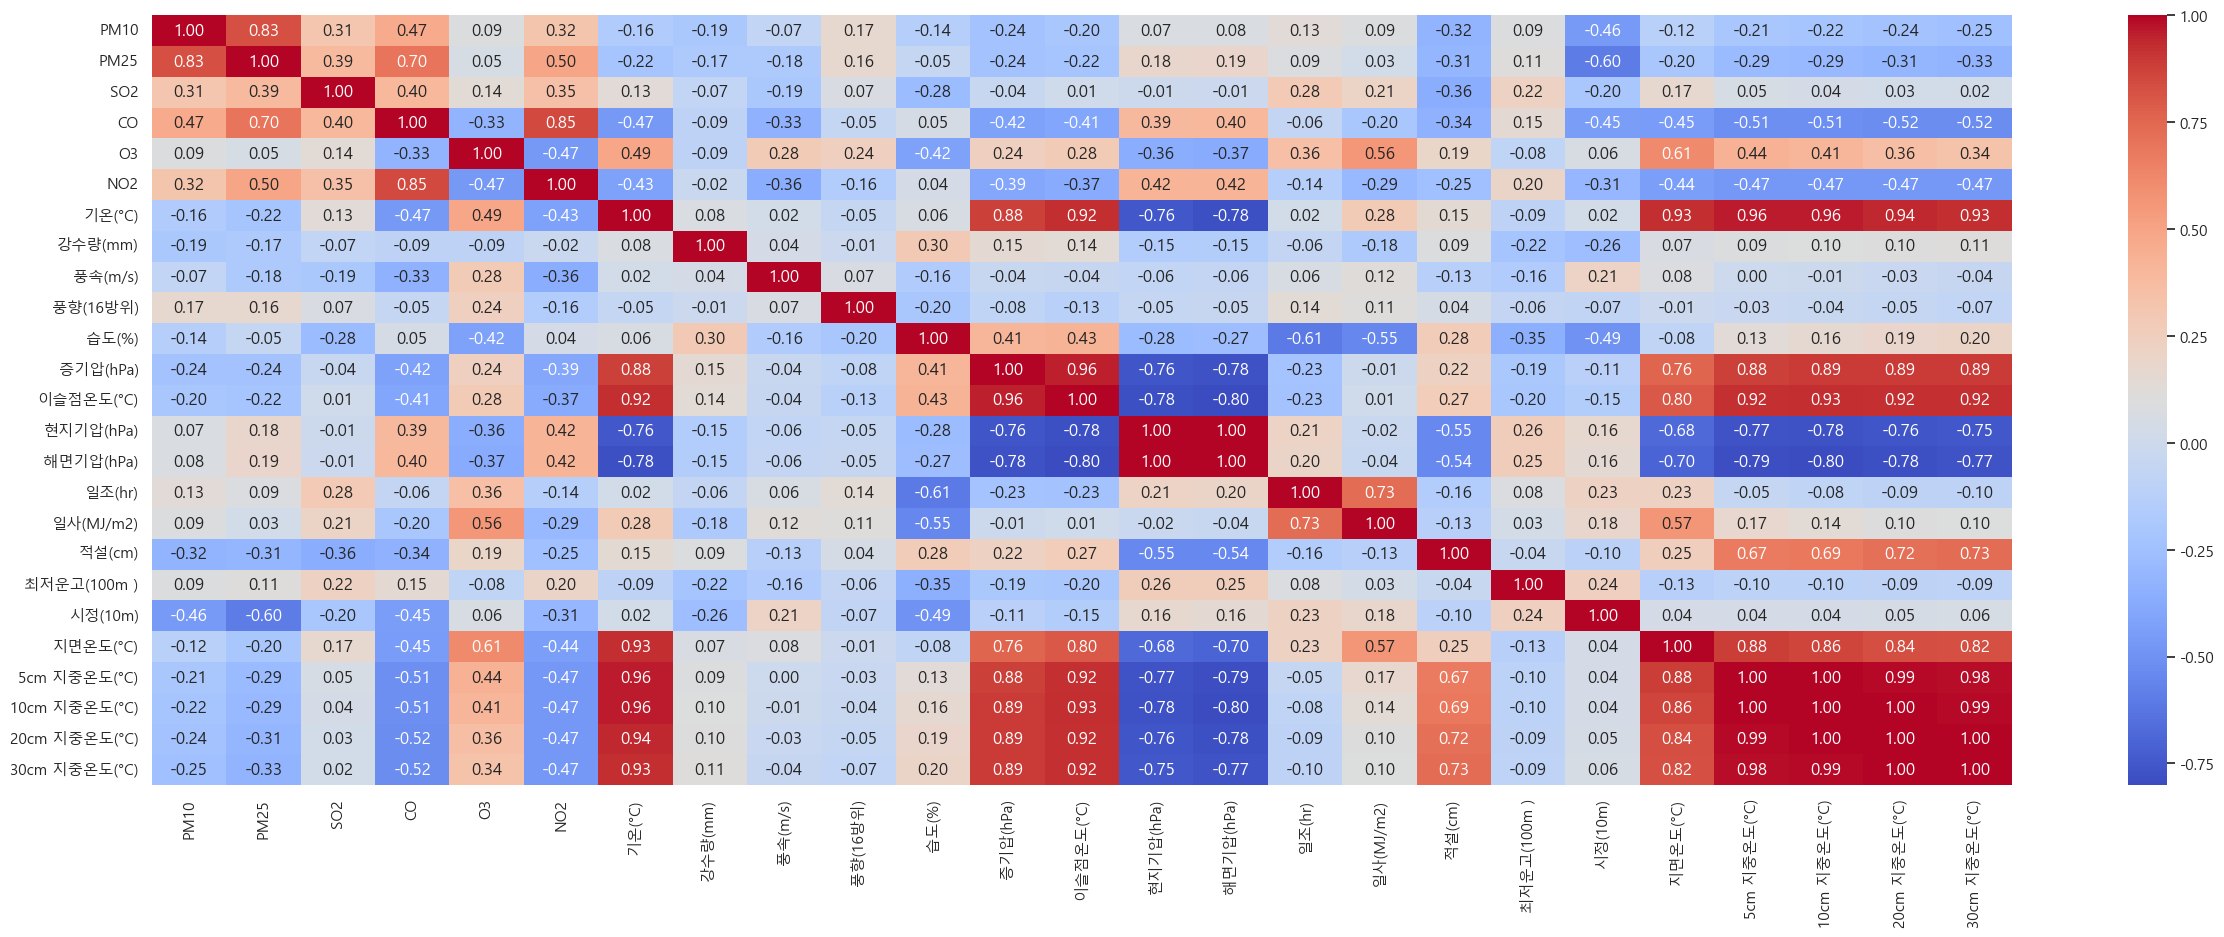

In [ ]:
# 결과확인
plt.figure(figsize=(30,10))
cr = df_24.loc[:,['PM10', 'PM25', 'SO2', 'CO', 'O3', 'NO2', '기온(°C)', '강수량(mm)','풍속(m/s)', 
                  '풍향(16방위)',  '습도(%)', '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)',
       '해면기압(hPa)', '일조(hr)', '일사(MJ/m2)','적설(cm)', '최저운고(100m )', '시정(10m)',
       '지면온도(°C)', '5cm 지중온도(°C)', '10cm 지중온도(°C)',
       '20cm 지중온도(°C)', '30cm 지중온도(°C)']].corr()
sns.heatmap(cr, annot=True, fmt=".2f", cmap='coolwarm')

plt.show()

#### **4) 사용하지 않을 변수 제거**

* 머신러닝에 사용하지 않을 변수들을 제거해줍니다.
    * df_24, df_25에 사용할 변수들만 넣어보세요.
* time 변수를 기준으로 오름차순으로 정렬하세요

In [ ]:
# df_24, df_25에 사용할 변수들만 할당
df_24 = df_24.loc[:,['CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)','풍향(16방위)', 
                     '증기압(hPa)',  '시정(10m)','30cm 지중온도(°C)']]
df_25 = df_25.loc[:,['CO', 'O3', 'NO2', 'PM10', 'PM25', '기온(°C)','풍향(16방위)', 
                     '증기압(hPa)',  '시정(10m)','30cm 지중온도(°C)']]

# time 변수를 기준으로 오름차순으로 정렬
df_24 = df_24.sort_index(ascending=True)
df_25 = df_25.sort_index(ascending=True)

# df_24, df_25의 변수 중 결측치를 처리(결측치 처리 방법은 다양!)
df_24 = df_24.interpolate(method='linear')
df_25 = df_25.interpolate(method='linear')

#### **5) 변수들의 결측치 처리**

In [46]:
# df_24, df_25의 결측치 확인
df_24.isnull().sum()
df_25.isnull().sum()

CO               25
O3               25
NO2              25
PM10             27
PM25             32
기온(°C)            0
풍향(16방위)          0
증기압(hPa)          0
시정(10m)           0
30cm 지중온도(°C)     0
dtype: int64

#### **6) 전일 같은 시간 미세먼지 농도 변수 추가**

* 먼저 df_24, df_25에 month, day, hour 변수를 추가하세요.
    * 예) dt.month, dt.day, dt.hour 사용 또는 datetimeindex에서는 df.index.month 등 사용 가능
* 모델링에 유용한 변수로 전일 같은 시간(24시간 전) 미세먼지 농도 변수를 추가하세요.
    * 시계열 데이터 처리를 위한 shift 연산을 참고하세요.

In [58]:
# df_24, df_25의 time을  month, day, hour 로 쪼개기 (year는 필요 없음). 이후에 저장 시 index(time)은 포함하지 않음.
df_24['month'] = df_24.index.month
df_24['day'] = df_24.index.day
df_24['hour'] = df_24.index.hour    

df_25['month'] = df_25.index.month
df_25['day'] = df_25.index.day
df_25['hour'] = df_25.index.hour

In [30]:
# 확인해보기
df_24.head()
df_25.head()

,CO,O3,NO2,PM10,PM25,기온(°C),풍향(16방위),증기압(hPa),시정(10m),30cm 지중온도(°C),month,day,hour
time,,,,,,,,,,,,,
2025-01-01 00:00:00,0.68,0.0045,0.0425,23.0,12.0,-1.2,290,3.4,3546,1.7,1,1,0
2025-01-01 01:00:00,0.73,0.0034,0.0457,24.0,11.0,-1.7,250,3.3,3274,1.7,1,1,1
2025-01-01 02:00:00,0.77,0.0032,0.0478,23.0,13.0,-1.8,340,3.4,3460,1.7,1,1,2
2025-01-01 03:00:00,0.76,0.0036,0.0458,31.0,17.0,-2.0,20,3.5,3256,1.7,1,1,3
2025-01-01 04:00:00,0.72,0.0035,0.0460,31.0,16.0,-2.3,20,3.5,3111,1.7,1,1,4


In [59]:
# df_24, df_25에 전일 같은 시간 미세먼지 농도 변수(PM10_lag1) 추가
# 전일 같은 시간은 24시간 전 입니다. (shift 함수 활용)
df_24['PM10_lag1'] = df_24['PM10'].shift(24)
df_25['PM10_lag1'] = df_25['PM10'].shift(24)


#### **7) t+1 시점의 미세먼지 농도 데이터 생성**
* t+1 시점은 1시간 후 입니다.
* t+1 시점의 미세먼지 농도 변수(PM10_1)를 생성하세요.
* t+1 시점의 미세먼지 농도는 머신러닝 모델을 통해 예측하려는 y값(target) 입니다.

In [60]:
# df_24, df_25에 t+1 시점 변수(PM10_1) 추가
# shift 함수 활용 해보기!
df_24['PM10_1'] = df_24['PM10'].shift(-1)
df_25['PM10_1'] = df_25['PM10'].shift(-1)

In [61]:
df_25.loc[:'2025-01-01 23:00:00','PM10_lag1'] = df_24.loc['2024-12-31 00:00:00':,'PM10'].values

In [65]:
# 결측치가 있다면 처리하고 확인해보기!
# df_24 = df_24.interpolate(method='time',inplace=True)
# df_25 = df_25.interpolate(method='time',inplace=True)

df_25

,CO,O3,NO2,PM10,PM25,기온(°C),풍향(16방위),증기압(hPa),시정(10m),30cm 지중온도(°C),month,day,hour,PM10_lag1,PM10_1
time,,,,,,,,,,,,,,,
2025-01-01 00:00:00,0.68,0.0045,0.0425,23.0,12.0,-1.2,290,3.4,3546,1.7,1,1,0,91.0,24.0
2025-01-01 01:00:00,0.73,0.0034,0.0457,24.0,11.0,-1.7,250,3.3,3274,1.7,1,1,1,100.0,23.0
2025-01-01 02:00:00,0.77,0.0032,0.0478,23.0,13.0,-1.8,340,3.4,3460,1.7,1,1,2,101.0,31.0
2025-01-01 03:00:00,0.76,0.0036,0.0458,31.0,17.0,-2.0,20,3.5,3256,1.7,1,1,3,101.0,31.0
2025-01-01 04:00:00,0.72,0.0035,0.0460,31.0,16.0,-2.3,20,3.5,3111,1.7,1,1,4,88.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-30 19:00:00,0.39,0.0591,0.0225,45.0,20.0,22.4,230,7.8,2971,14.7,4,30,19,51.0,45.0
2025-04-30 20:00:00,0.50,0.0553,0.0273,45.0,23.0,20.4,270,7.8,2815,14.7,4,30,20,48.0,45.0
2025-04-30 21:00:00,0.36,0.0701,0.0164,45.0,23.0,19.4,230,7.6,2633,14.7,4,30,21,47.0,39.0


In [64]:
df_24['PM10_lag1'].interpolate(method='linear', inplace=True)
df_24

C:\Users\User\AppData\Local\Temp\ipykernel_22952\1132223192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_24['PM10_lag1'].interpolate(method='linear', inplace=True)


,CO,O3,NO2,PM10,PM25,기온(°C),풍향(16방위),증기압(hPa),시정(10m),30cm 지중온도(°C),month,day,hour,PM10_lag1,PM10_1
time,,,,,,,,,,,,,,,
2024-01-01 00:00:00,1.21,0.0022,0.0425,29.0,23.0,0.6,20.0,6.2,394,1.0,1,1,0,NaN,24.0
2024-01-01 01:00:00,1.16,0.0020,0.0393,24.0,21.0,0.5,50.0,6.1,402,1.0,1,1,1,NaN,23.0
2024-01-01 02:00:00,1.00,0.0022,0.0359,23.0,19.0,0.4,0.0,6.2,616,1.0,1,1,2,NaN,23.0
2024-01-01 03:00:00,0.98,0.0021,0.0355,23.0,18.0,-0.1,20.0,6.0,265,1.0,1,1,3,NaN,25.0
2024-01-01 04:00:00,1.02,0.0020,0.0371,25.0,21.0,-0.2,20.0,5.9,203,1.0,1,1,4,NaN,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-31 19:00:00,0.36,0.0284,0.0166,25.0,14.0,0.5,270.0,2.9,3760,1.7,12,31,19,72.0,23.0
2024-12-31 20:00:00,0.36,0.0257,0.0187,23.0,12.0,0.0,250.0,2.9,3645,1.7,12,31,20,74.0,19.0
2024-12-31 21:00:00,0.40,0.0204,0.0238,19.0,12.0,-0.7,270.0,3.0,3794,1.7,12,31,21,74.0,21.0


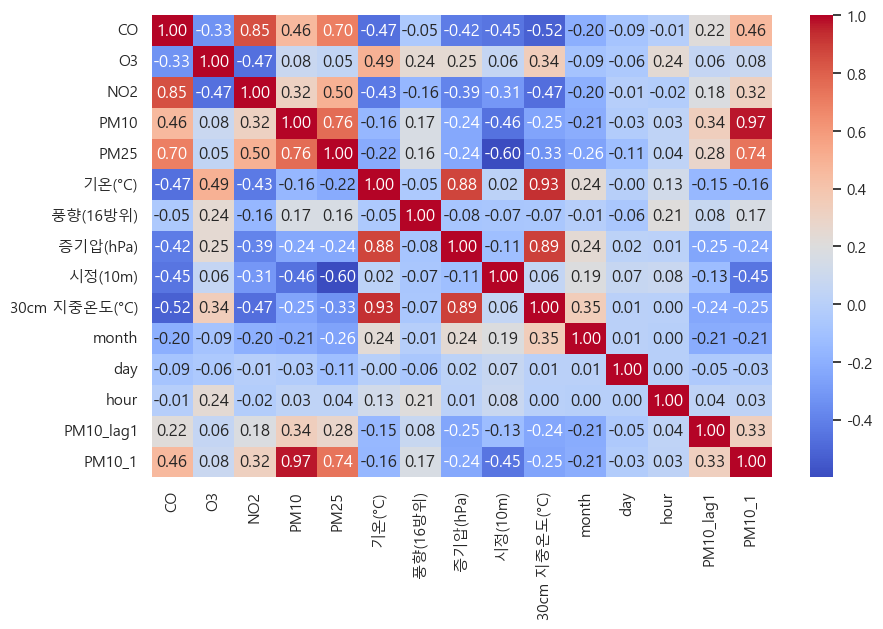

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(df_24.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

### (2) train, test 데이터 분리 및 저장

* 24년도 데이터(df_24)를 train 데이터로 저장하세요. y 값을 제외하고 train_x로 저장한 후 y 값은 train_y로 저장하세요.
* 25년도 데이터(df_25)를 test 데이터로 저장하세요. y 값을 제외하고 test_x로 저장한 후 y 값은 test_y로 저장하세요.
* train_x, test_x 에서 'time' 변수 (또는 인덱스)는 제외헤주세요
* y값은 'PM10_1' 즉, t+1 시점의 미세먼지 농도입니다.
* 각각의 데이터프레임을 csv 파일로 저장하세요. (train_x.csv / train_y.csv / test_x.csv / test_y.csv) (단, 인덱스 제외)


In [67]:
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
train_x = df_24.drop(columns=['PM10_1'])
train_y = df_24['PM10_1']
test_x = df_25.drop(columns=['PM10_1'])
test_y = df_25['PM10_1']


★ csv 파일이 잘 생성되었는지 확인하세요. 혹시 모르니 저장해두는 것을 추천드립니다. ★

In [68]:
# 각각의 데이터프레임을 csv 파일로 저장 (train_x.csv / train_y.csv / test_x.csv / test_y.csv)
train_x.to_csv('./train_x.csv', index=False)
train_y.to_csv('./train_y.csv', index=False)
test_x.to_csv('./test_x.csv', index=False)
test_y.to_csv('./test_y.csv', index=False)


## **0.프로젝트 소개**

### (1) 수행 목표
- 미세먼지 농도를 예측하는 머신러닝 모델을 만드세요.

#### 우리가 풀어야 하는 문제는 무엇인가요?
* 서울 지역의 미세먼지 데이터와 날씨 데이터를 활용하여,
미세먼지 예측에 관련 있는 데이터 항목으로 데이터를 구성, 전처리 하여
미세먼지 농도를 예측하는 머신러닝 모델 구현


### (2) 데이터 소개

#### 1) 기본 데이터

* 학습 데이터
    * air_2024.csv : 2024년 미세먼지 데이터
    * weather_2024.csv : 2024년 날씨 데이터
* 테스트 데이터
    * air_2025.csv : 2025년 미세먼지 데이터
    * weather_2025.csv : 2025년 날씨 데이터

#### 2) 데이터셋의 변수 소개(weather_202x)

* 증기압: 증기가 고체 또는 액체와 동적 평형 상태에 있을 때 증기의 압력 (증기가 되려는 힘)
* 이슬점 온도: 불포화 상태의 공기가 냉각될 때, 포화 상태에 도달하여 수증기의 응결이 시작되는 온도
* 일조: 일정한 물체나 땅의 겉면에 태양 광선이 비치는 시간 (1시간 중 비율)
* 일사(량): 태양으로부터 오는 태양 복사 에너지가 지표에 닿는 양 (면적당 에너지 량)
* 전운량: 하늘을 육안으로 관측하여 전부 구름일 때 10, 구름이 덮고 있는 하늘의 비율에 따라 0~10
* 중하층운량: 중층과 하층에 있는 구름의 분포량(중하층 구름이 날씨에 영향 주므로 따로 표기)
* 운형(운형약어): 구름의 종류. 약어 코드로 기재됨
* 최저운고: 가장 낮은 구름의 높이
* 현상번호(국내식): 비, 소낙비, 싸락눈, 눈보라 등의 기상현상을 나타낸 코드번호
* 지면온도: 지면 0cm 온도
* 지중온도: 땅 속 온도변수1

## **1.환경설정**

* 세부 요구사항
    - 경로 설정 : 프로젝트 폴더를 준비하고 데이터를 로딩하시오.
        * 구글코랩
            * 구글 드라이브에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
        * (필요시) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
            
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.

### (1) 경로 설정
* 구글 코랩 (또는 필요시 로컬)를 사용하시면 됩니다.

#### 1) 구글 코랩 수행

* 구글 드라이브 연결

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

#### 1) 라이브러리 설치 및 로딩

In [ ]:
# 필요한 라이브러리 설치 및 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import joblib

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm
import joblib

# 더 필요한 라이브러리를 아래에 추가합니다.



> **<span style="color:red">다음 문항을 풀기 전에 </span>아래 코드를 실행하세요.**
<small>(해결되지 않는다면 아래 Colab 한글 깨짐 현상 해결법 참고)<br>https://developnote.tistory.com/165#google_vignette </small>

In [ ]:
# (Jupyter) 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

In [ ]:
# (Colab) 시각화 한글폰트 설정을 위해 아래 코드를 실행하세요.
# !apt -qq -y install fonts-nanum > /dev/null
# !rm -rf ~/.cache/matplotlib

# import matplotlib as mpl
# import matplotlib.font_manager as fm
# import logging
# logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

# font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
# fm.fontManager.addfont(font_path)
# mpl.rcParams['font.family'] = 'NanumGothic'
# mpl.rcParams['axes.unicode_minus'] = False

### (3) 데이터 불러오기
* 주어진 데이터셋
    * 미세먼지 및 날씨 데이터 : train_x.csv / train_y.csv / test_x.csv / test_y.csv

#### 1) 데이터 로딩

In [ ]:
# train_x.csv / train_y.csv / test_x.csv / test_y.csv 4개의 데이터 로딩
import os
train_x = pd.read_csv('./train_x.csv')
train_y = pd.read_csv('./train_y.csv')
test_x = pd.read_csv('./test_x.csv')
test_y = pd.read_csv('./test_y.csv')

# train_x, train_y, test_x, test_y 데이터 확인
print(train_x.shape)
print(train_y.shape)        

(8784, 14)
(8784, 1)


In [ ]:
train_x.describe()

,CO,O3,NO2,PM10,PM25,기온(°C),풍향(16방위),증기압(hPa),시정(10m),30cm 지중온도(°C),month,day,hour,PM10_lag1
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8760.000000
mean,0.411924,0.034455,0.019612,30.671505,18.993283,14.869331,176.999089,13.590403,2326.851434,15.008322,6.513661,15.756831,11.500000,30.619463
std,0.169321,0.021455,0.013229,24.729299,13.592115,10.903428,106.745387,9.325785,1204.915094,9.514987,3.451430,8.812031,6.922581,24.699518
min,0.100000,0.001300,0.002800,3.000000,1.000000,-14.000000,0.000000,1.100000,24.000000,0.300000,1.000000,1.000000,0.000000,3.000000
25%,0.300000,0.020600,0.010600,17.000000,10.000000,4.700000,50.000000,5.400000,1357.000000,5.000000,4.000000,8.000000,5.750000,17.000000
50%,0.370000,0.031661,0.015800,26.000000,16.000000,15.900000,200.000000,11.300000,2290.000000,16.400000,7.000000,16.000000,11.500000,26.000000
75%,0.480000,0.044700,0.024300,38.000000,25.000000,24.400000,270.000000,20.000000,3220.250000,24.200000,10.000000,23.000000,17.250000,38.000000
max,1.560000,0.177300,0.106400,442.000000,96.000000,36.300000,360.000000,35.900000,5000.000000,29.700000,12.000000,31.000000,23.000000,442.000000


In [ ]:
# train_x = train_x.drop(['PM10'],axis=1)
# test_x = test_x.drop(['PM10'],axis=1) # PM10 컬럼 제거

In [ ]:
train_x
test_x.dropna(inplace=True)

#### 2) 기본 정보 조회
* 로딩한 데이터의 기본 정보를 확인 합니다

In [ ]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
train_x.isnull().sum()

CO                0
O3                0
NO2               0
PM10              0
PM25              0
기온(°C)            0
풍향(16방위)          0
증기압(hPa)          0
시정(10m)           0
30cm 지중온도(°C)     0
month             0
day               0
hour              0
PM10_lag1        24
dtype: int64

## **2.머신러닝 모델링**

### (1) 모델링: LinearRegression

* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R2 Score(소수점 다섯째 자리까지)

In [ ]:
# LinearRegression 코드를 작성하세요.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score    

Lr = LinearRegression()
Lr.fit(train_x[24:-1], train_y[24:-1])
pred = Lr.predict(test_x[:-1])
mse = mean_squared_error(test_y[:-1], pred)
r2 = r2_score(test_y[:-1], pred)
print("MSE: ", mse)
print("R2: ", r2)   

MSE:  51.430489692366095
R2:  0.9316147586063722


In [ ]:
# predict로 예측하여 y_pred_LR에 저장해보세요.
y_pred_LR = Lr.predict(test_x)
y_pred_LR

array([[25.41891011],
       [26.64604394],
       [25.8961213 ],
       ...,
       [44.66899087],
       [39.42022485],
       [41.13363042]], shape=(2880, 1))

In [ ]:
# test_y 데이터와 y_pred_LR 데이터로 성능을 평가하여 출력해보세요.
# 성능지표는 mse와 r2를 이용하세요.
y_pred_LR = pd.DataFrame(y_pred_LR, columns=['PM10'])
mse = mean_squared_error(test_y[:-1], y_pred_LR[:-1])
r2 = r2_score(test_y[:-1], y_pred_LR[:-1])
print("MSE: ", round(mse,5))
print("R2: ", round(r2,5))


MSE:  51.43049
R2:  0.93161


In [ ]:
# 학습한 모델을 pkl 파일로 저장해보세요.
joblib.dump(Lr, './linear_regression_model.pkl')

['./linear_regression_model.pkl']

### (2) 모델링: RandomForest

* 랜덤포레스트: 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R2 Score(소수점 다섯째 자리까지)

In [ ]:
# 랜덤포레스트로 모델 학습 진행하고 성능을 평가하여 출력해 보세요.
# 성능평가는 MSE, R2 Score
from sklearn.ensemble import RandomForestRegressor
Rf = RandomForestRegressor(n_estimators=100, random_state=42)
Rf.fit(train_x[24:-1], train_y[24:-1].values.ravel())
y_pred_Rf = Rf.predict(test_x[:-1])
mse = mean_squared_error(test_y[:-1], y_pred_Rf)
r2 = r2_score(test_y[:-1], y_pred_Rf)
print("MSE: ", round(mse,5))
print("R2: ", round(r2,5))


MSE:  58.82973
R2:  0.92178


In [ ]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(Rf, './random_forest_model.pkl')

['./random_forest_model.pkl']

### (2-1) 랜덤포레스트 feature_importances 확인
* 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.

In [ ]:
# 렌덤포레스트로 학습한 모델의 feature_importances를 구해보세요.
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
feature_importances = pd.DataFrame(Rf.feature_importances_, index = train_x.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
PM10,0.933524
hour,0.017032
시정(10m),0.008898
PM10_lag1,0.005709
기온(°C),0.004619
O3,0.004585
NO2,0.004381
CO,0.004285
PM25,0.003917
풍향(16방위),0.003298


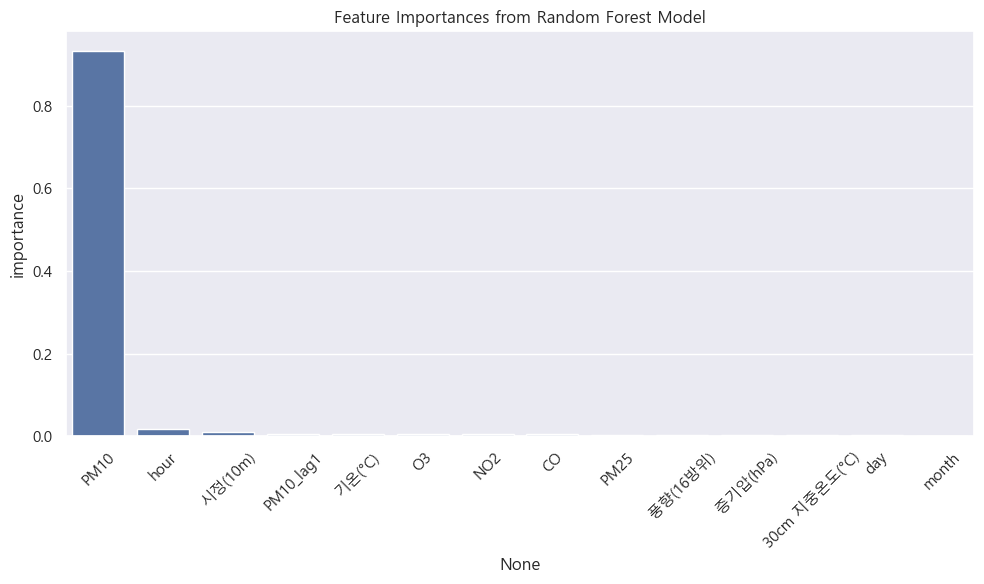

In [ ]:
# feature_importances 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances.index, y='importance', data=feature_importances)
plt.xticks(rotation=45) # x축 라벨이 겹치지 않도록 회전
plt.title('Feature Importances from Random Forest Model')           
plt.tight_layout()
plt.show()

### (3) 모델링: GradientBoosting

* GradientBoosting: 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R2 Score(소수점 다섯째 자리까지)

In [ ]:
# 모델 학습 진행 하고 성능을 평가하여 출력해 보세요.
# 성능평가는 MSE, R2 Score
from sklearn.ensemble import GradientBoostingRegressor
Gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
Gbr.fit(train_x[24:-1], train_y[24:-1].values.ravel())
y_pred_Gbr = Gbr.predict(test_x[:-1])
mse = mean_squared_error(test_y[:-1], y_pred_Gbr)
r2 = r2_score(test_y[:-1], y_pred_Gbr)
print("MSE: ", round(mse,5))
print("R2: ", round(r2,5))
  

MSE:  50.81318
R2:  0.93244


In [ ]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(Gbr, './gradient_boost_model.pkl')


['./gradient_boost_model.pkl']

### (3-1) 그라디언트부스팅 feature_importances 확인
* 학습한 모델의 feature_importances를 구해보세요.

In [ ]:
# 그라디언트부스팅으로 학습한 모델의 feature_importances를 구해보세요.
# 아래에 필요한 코드를 작성하고 결과를 확인합니다.
feature_importances_gb = pd.DataFrame(Gbr.feature_importances_, index = train_x.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_gb


,importance
PM10,0.962149
hour,0.023558
기온(°C),0.002979
풍향(16방위),0.002954
CO,0.002387
PM25,0.001875
시정(10m),0.000949
O3,0.000777
PM10_lag1,0.000706
NO2,0.000598


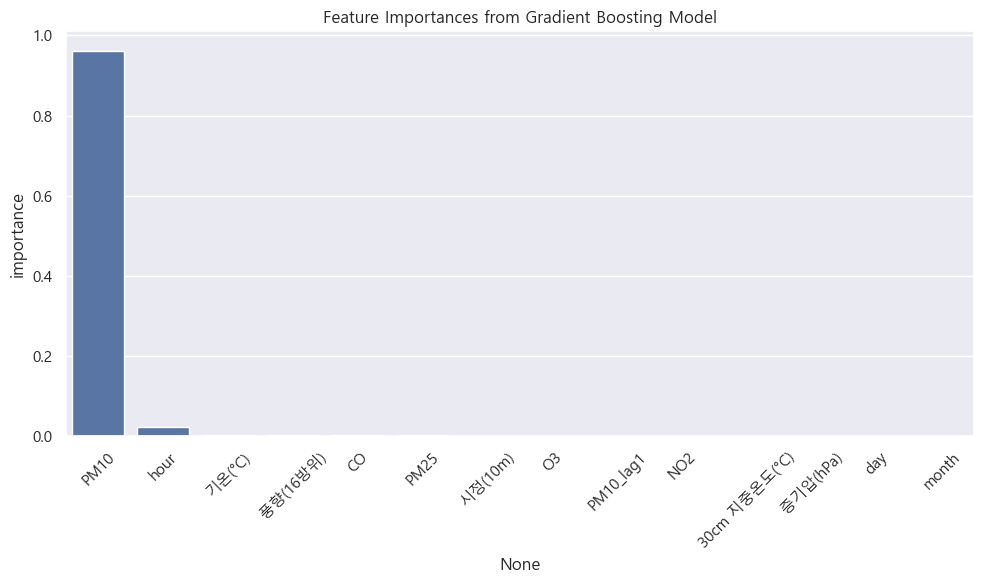

In [ ]:
# feature_importances 시각화
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances_gb.index, y='importance', data=feature_importances_gb)
plt.xticks(rotation=45) # x축 라벨이 겹치지 않도록 회전
plt.title('Feature Importances from Gradient Boosting Model')   
plt.tight_layout()
plt.show()

### (4) 모델링: Self Choice Model(XGBoost)

* Self Choice Model: 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 그리고 모델 파일을 pkl로 저장해주세요.
* 성능지표 : MSE, R2 Score(소수점 다섯째 자리까지)

In [ ]:
# 모델 학습 진행 하고 성능을 평가하여 출력해 보세요.
# (예시)xgboost 등
from xgboost import XGBRegressor
Xgb = XGBRegressor(n_estimators=100, random_state=42)
Xgb.fit(train_x[24:-1], train_y[24:-1].values.ravel())
y_pred_Xgb = Xgb.predict(test_x[:-1])
mse = mean_squared_error(test_y[:-1], y_pred_Xgb)
r2 = r2_score(test_y[:-1], y_pred_Xgb)

In [ ]:
# 학습한 모델을 파일로 저장해보세요.
joblib.dump(Xgb, './xgboost_model.pkl')

['./xgboost_model.pkl']

MSE:  76.53241
R2:  0.89824


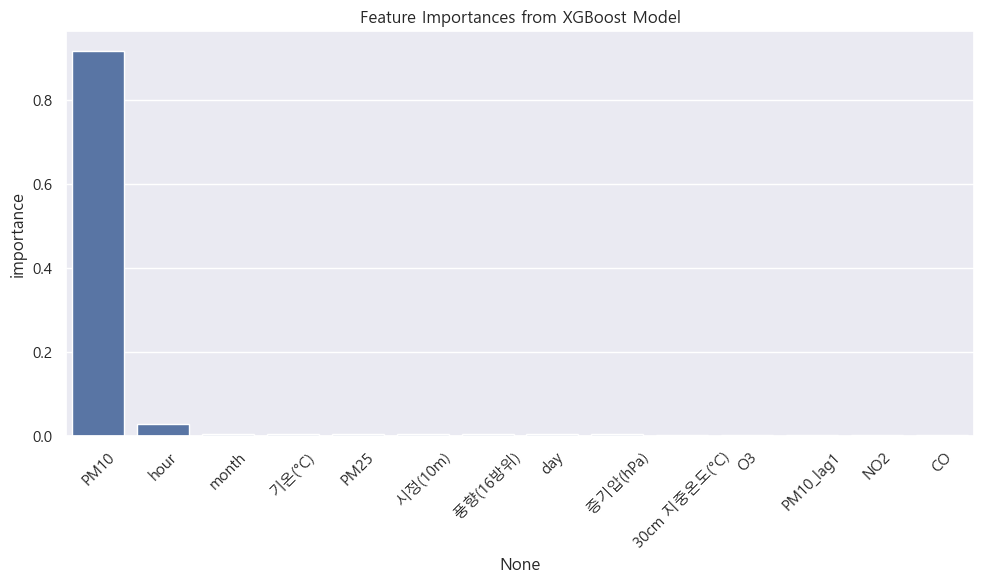

In [ ]:
# (다음 진행은 선택입니다)
# self choice model로 학습한 모델의 feature_importances를 구해보세요.
# 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.
# Feature의 중요도 확인 및 시각화
print("MSE: ", round(mse,5))
print("R2: ", round(r2,5))

feature_importances_xgb = pd.DataFrame(Xgb.feature_importances_, 
                                index = train_x.columns, 
                                columns=['importance']).sort_values.('importance', ascending=False)


plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances_xgb.index, y='importance', data=feature_importances_xgb)
plt.xticks(rotation=45) # x축 라벨이 겹치지 않도록 회전
plt.title('Feature Importances from XGBoost Model')   
plt.tight_layout()
plt.show()

Linear Regression - MSE:  51.43049  R2:  0.93161
Random Forest - MSE:  58.82973  R2:  0.92178
Gradient Boosting - MSE:  50.81318  R2:  0.93244
XGBoost - MSE:  76.53241  R2:  0.89824


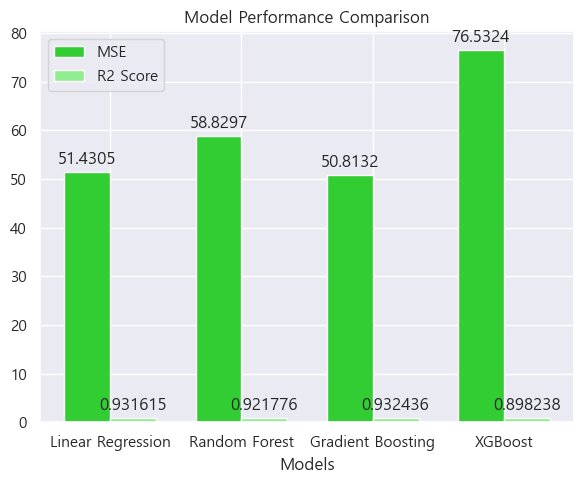

In [ ]:
# 결과확인(mse, r2) 

print("Linear Regression - MSE: ", round(mean_squared_error(test_y[:-1], y_pred_LR[:-1]),5), 
      " R2: ", round(r2_score(test_y[:-1], y_pred_LR[:-1]),5))
print("Random Forest - MSE: ", round(mean_squared_error(test_y[:-1], y_pred_Rf),5), 
      " R2: ", round(r2_score(test_y[:-1], y_pred_Rf),5))
print("Gradient Boosting - MSE: ", round(mean_squared_error(test_y[:-1], y_pred_Gbr),5), 
      " R2: ", round(r2_score(test_y[:-1], y_pred_Gbr),5))
print("XGBoost - MSE: ", round(mean_squared_error(test_y[:-1], y_pred_Xgb),5), 
      " R2: ", round(r2_score(test_y[:-1], y_pred_Xgb),5))
# 모델별 성능 비교 시각화
models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
mse_values = [mean_squared_error(test_y[:-1], y_pred_LR[:-1]),
              mean_squared_error(test_y[:-1], y_pred_Rf),
              mean_squared_error(test_y[:-1], y_pred_Gbr),
              mean_squared_error(test_y[:-1], y_pred_Xgb)]
r2_values = [r2_score(test_y[:-1], y_pred_LR[:-1]),
             r2_score(test_y[:-1], y_pred_Rf),  
             r2_score(test_y[:-1], y_pred_Gbr),
             r2_score(test_y[:-1], y_pred_Xgb)]
x = np.arange(len(models))
width = 0.35
fig, ax1 = plt.subplots(figsize=(6, 5))
bar1 = ax1.bar(x - width/2, mse_values, width, label='MSE', color='limegreen')
bar2 = ax1.bar(x + width/2, r2_values, width, label='R2 Score', color='lightgreen')
ax1.set_xlabel('Models')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.bar_label(bar1, padding=3)
ax1.bar_label(bar2, padding=3)
plt.tight_layout()
plt.show()
#!/usr/bin/env python3